In [ ]:
import pandas as pd
from google.colab import drive
import numpy as np

drive.mount('/content/drive')
path = '/content/drive/MyDrive/NR-ER'

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
!pip install niapy --pre
!pip install scikit-learn
!pip install keras
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df_train = pd.read_csv("{}/train_resample.csv".format(path))
df_test = pd.read_csv("{}/test_NRER.csv".format(path))
df_train.head(2)
df_test.head(2)

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP6,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,...,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP872,PubchemFP875,PubchemFP878,NR-ER
0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
X_train = df_train.drop('NR-ER', axis=1)
y_train = df_train['NR-ER']


X_test = df_test.drop('NR-ER', axis=1)
y_test = df_test['NR-ER']

In [ ]:
X_train = X_train.values
y_train = y_train.values
X_test = X_test.values
y_test = y_test.values

In [ ]:
X_train

array([[1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0]])

In [ ]:
y_train

array([0, 0, 1, ..., 1, 1, 1])

In [ ]:
# sc = StandardScaler()
# # X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=128, activation='relu', input_dim=732),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               93824     
                                                                 
 dense_5 (Dense)             (None, 56)                7224      
                                                                 
 dense_6 (Dense)             (None, 32)                1824      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 102,905
Trainable params: 102,905
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, epochs=200, batch_size=128, validation_split=0.3, callbacks=[callback])
len(history.history['loss'])

Epoch 1/200
52/52 [==============================] - 2s 11ms/step - loss: 0.5060 - accuracy: 0.7764 - val_loss: 0.8991 - val_accuracy: 0.4857
Epoch 2/200
52/52 [==============================] - 0s 6ms/step - loss: 0.4002 - accuracy: 0.8353 - val_loss: 0.7227 - val_accuracy: 0.5925
Epoch 3/200
52/52 [==============================] - 0s 6ms/step - loss: 0.3582 - accuracy: 0.8481 - val_loss: 0.4627 - val_accuracy: 0.7496
Epoch 4/200
52/52 [==============================] - 0s 6ms/step - loss: 0.3387 - accuracy: 0.8547 - val_loss: 0.4111 - val_accuracy: 0.8031
Epoch 5/200
52/52 [==============================] - 0s 6ms/step - loss: 0.2932 - accuracy: 0.8813 - val_loss: 0.3480 - val_accuracy: 0.8390
Epoch 6/200
52/52 [==============================] - 0s 6ms/step - loss: 0.2650 - accuracy: 0.8951 - val_loss: 0.3736 - val_accuracy: 0.8263
Epoch 7/200
52/52 [==============================] - 0s 6ms/step - loss: 0.2434 - accuracy: 0.9019 - val_loss: 0.3594 - val_accuracy: 0.8471
Epoch 8/200


54

In [ ]:
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

73/73 [==============================] - 0s 2ms/step - loss: 0.7992 - accuracy: 0.8774
Accuracy: 87.74


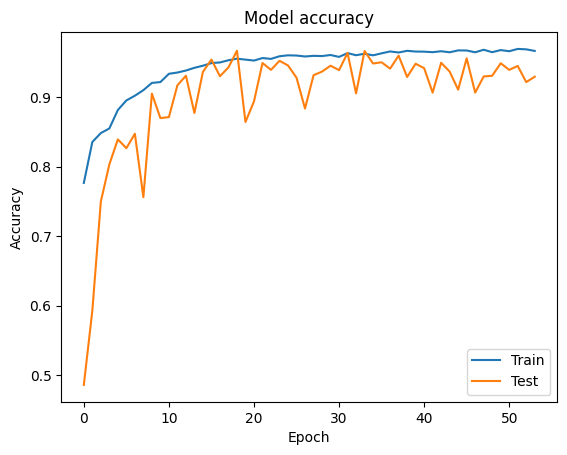

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

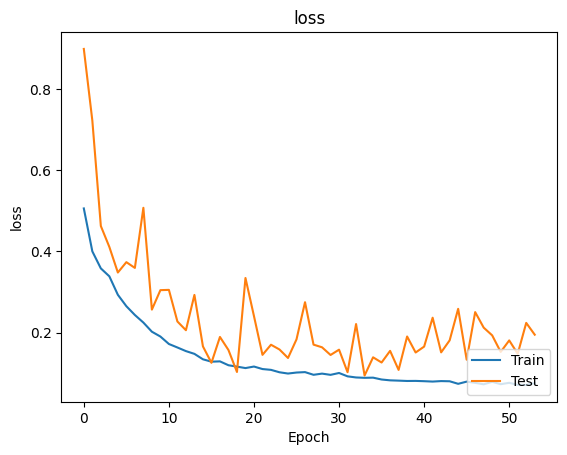

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

In [ ]:
pip install pyyaml h5py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os

import tensorflow as tf
from tensorflow import keras

In [ ]:
model.save("{}/model.h5".format(path))

In [ ]:
new_model = tf.keras.models.load_model("{}/model.h5".format(path))

In [ ]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               93824     
                                                                 
 dense_5 (Dense)             (None, 56)                7224      
                                                                 
 dense_6 (Dense)             (None, 32)                1824      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 102,905
Trainable params: 102,905
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_test, y_pred) 

73/73 [==============================] - 0s 3ms/step


In [ ]:
cm_test

array([[1910,  118],
       [ 165,  116]])

In [ ]:
y_pred = model.predict(X_train)
y_pred = (y_pred > 0.5)

from sklearn.metrics import confusion_matrix
cm_train = confusion_matrix(y_train, y_pred) 

296/296 [==============================] - 1s 2ms/step


In [ ]:
cm_train

array([[4673,   58],
       [ 312, 4419]])